In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [161]:
df=pd.read_csv("NED26.05.1-D-12.1.0-20160501.csv",skiprows=12)

In [162]:
df.shape

(125935, 15)

In [163]:
df=df[np.isnan(df['redshift (z)'])]

In [164]:
df.shape

(98874, 15)

In [165]:
df=df[df['D (Mpc)']<500]

In [166]:
df.shape

(93161, 15)

In [167]:
df=df[np.isfinite(df.err)]

In [168]:
df.shape

(83244, 15)

In [169]:
df=df[df['D (Mpc)']>35]

In [170]:
df.shape

(54398, 15)

In [171]:
df.head()

,Exclusion Code,D,G,Galaxy ID,m-M,err,D (Mpc),Method,REFCODE,SN ID,redshift (z),Hubble const.,Adopted LMC modulus,Date (Yr. - 1980),Notes
4,NaN,3,2,UGC 12889,34.16,0.40,68.0,Tully-Fisher,2007A&A...465...71T,NaN,NaN,NaN,NaN,27,mean
5,NaN,4,2,UGC 12889,34.66,0.45,85.6,Tully-Fisher,2007A&A...465...71T,NaN,NaN,NaN,NaN,27,K
6,NaN,5,2,UGC 12889,34.68,0.47,86.1,Tully-Fisher,2007A&A...465...71T,NaN,NaN,NaN,NaN,27,H
7,NaN,6,2,UGC 12889,34.70,0.46,86.9,Tully-Fisher,2007A&A...465...71T,NaN,NaN,NaN,NaN,27,J
8,NaN,7,3,KUG 2357+228,33.52,0.20,50.6,Tully-Fisher,2013AJ....146...86T,NaN,NaN,74.4,NaN,33,NaN


In [175]:
for i in np.unique(df.Method):
    df1=df[df.Method==i]
    print i,df1.shape

AGN time lag (24, 15)
Black Hole (12, 15)
CMD (3, 15)
Cepheids (4, 15)
D-Sigma (815, 15)
Dwarf Galaxy Diameter (6, 15)
FP (11038, 15)
Faber-Jackson (527, 15)
GCLF (36, 15)
GeV TeV ratio (3, 15)
H I + optical distribution (1, 15)
HII region diameter (1, 15)
IRAS (2089, 15)
Maser (6, 15)
Ring Diameter (71, 15)
SBF (236, 15)
SGRB (5, 15)
SNII optical (319, 15)
SNII radio (6, 15)
SNIa (1988, 15)
SZ effect (5, 15)
Sosies (129, 15)
Tertiary (92, 15)
Tully est (264, 15)
Tully-Fisher (36718, 15)


In [181]:
np.unique(df1.Method)

array(['Tully-Fisher'], dtype=object)

In [182]:
disterr=0.461*df1['D (Mpc)']*df1.err

In [183]:
def c4(em):
    return np.sqrt(2/(em-1.))*gamma(em/2.)/gamma((em-1.)/2)

In [184]:
listcut=np.unique(df1['Galaxy ID'])

In [185]:
listcut.shape

(9123,)

In [387]:
errlist=np.zeros((len(listcut),7))
k=0
for i in listcut:
    dfilter=(df1['Galaxy ID']==i)
    if(len(df1[dfilter])>8):
        dummy=df1[dfilter]
        dumerr=disterr[dfilter]
        em=len(dumerr)
        dumw=dumerr/dummy['D (Mpc)']
        dumw=np.sqrt(dumerr)
        wave=(dummy['D (Mpc)']*1/dumw**2).sum()/(1/dumw**2).sum()
        wstd=np.sqrt((((dummy['D (Mpc)']-wave)**2)*1/dumw**2).sum()/((em-1./em)*(1/dumw**2).sum()))
        uwerr=dummy['D (Mpc)'].std()/c4(em)
        uwav=dummy['D (Mpc)'].mean()
        werr=wstd/c4(em)
        errlist[k,0]=wave
        errlist[k,1]=em
        errlist[k,2]=werr
        errlist[k,3]=dumerr.mean()
        errlist[k,4]=uwerr
        errlist[k,5]=uwav
        errlist[k,6]=(dumerr/dummy['D (Mpc)']).mean()
    k+=1
# seria bueno calcular el promedio de dumerr/dummy['D']

In [388]:
(errlist[:,0]!=0).sum()

970

In [585]:
filter=(errlist[:,0][(errlist[:,0]!=0)]<500)

(0, 200)

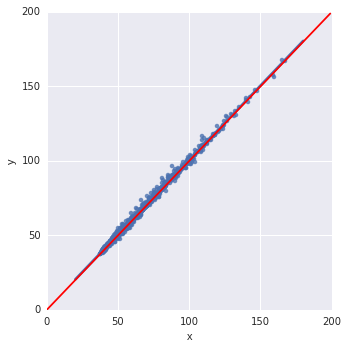

In [586]:
# weighted vs. unweighted mean
x=errlist[(errlist[:,0]!=0)][:,0]
y=errlist[(errlist[:,0]!=0)][:,5]
df5=pd.DataFrame({'x' : x, 'y': y})
sns.lmplot(x="x", y="y", data=df5)
aaa=200
plt.plot(range(aaa),range(aaa),c='r')
plt.xlim(0,aaa)
plt.ylim(0,aaa)

(0, 20)

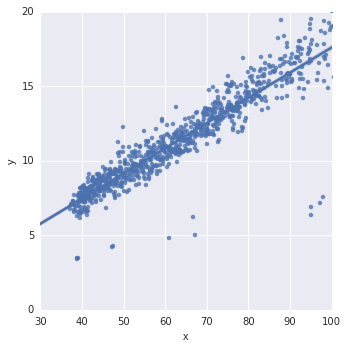

In [587]:
# mean reported error
x=errlist[(errlist[:,0]!=0)][:,0][filter]
y=errlist[(errlist[:,0]!=0)][:,3][filter]
df5=pd.DataFrame({'x' : x, 'y': y})
sns.lmplot(x="x", y="y", data=df5)
plt.xlim(30,100)
plt.ylim(0,20)

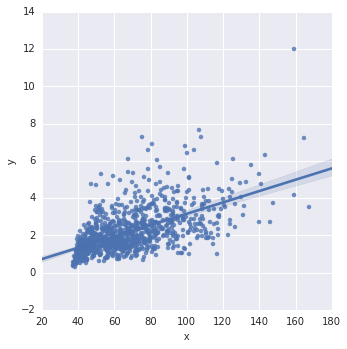

In [604]:
# weighted std
x=errlist[(errlist[:,0]!=0)][:,0][filter]
y=errlist[(errlist[:,0]!=0)][:,2][filter]
df5=pd.DataFrame({'x' : x, 'y': y})
sns.lmplot(x="x", y="y", data=df5)

In [504]:
A = np.vstack((np.ones_like(x), x)).T
C = np.diag(y * y)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

In [505]:
b_ls

-0.069391060566362128

In [506]:
m_ls

0.024025136573274347

In [507]:
import emcee

In [508]:
def lnlike(theta, x, y):
    m ,b = theta
    model = m * x +b
    inv_sigma2 = 1.0/(model**2)
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

In [509]:
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_ls, b_ls], args=(x, y))
m_ml, b_ml= result["x"]

In [510]:
b_ml

-0.054221120896272151

In [511]:
m_ml

0.023400097867217487

In [512]:
def lnprior(theta):
    m, b = theta
    if 0 < m < 0.5 and -0.5 < b < 0.5:
        return 0.0
    return -np.inf

In [513]:
def lnprob(theta, x, y):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y)

In [534]:
ndim, nwalkers = 2, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [535]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y))

In [536]:
sampler.run_mcmc(pos, 500);

In [537]:
sampler.chain.shape

(100, 500, 2)

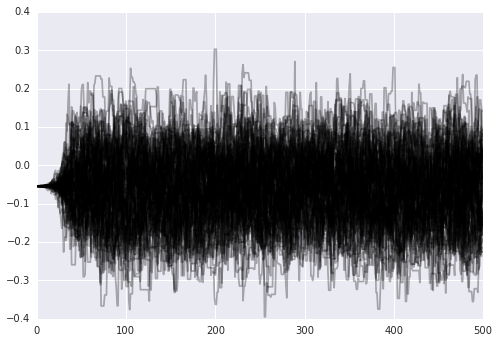

In [702]:
res=plt.plot(sampler.chain[:,:,1].T, '-', color='k', alpha=0.3)

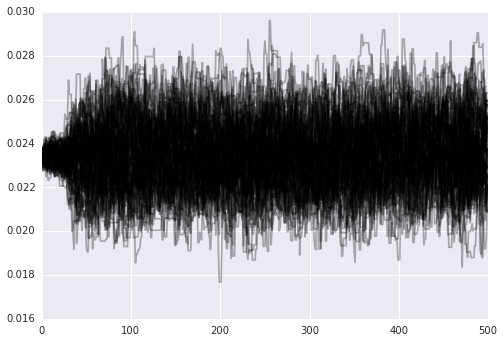

In [539]:
res=plt.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)

In [540]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

In [696]:
sampler.chain.shape

(100, 500, 2)

In [542]:
import corner

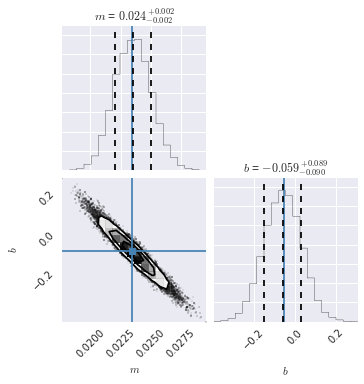

In [543]:

fig = corner.corner(samples, labels=["$m$", "$b$"],
                      truths=[m_ml, b_ml], quantiles=[0.16, 0.5, 0.84], show_titles=True,title_fmt='.3f')


(array([    27.,    434.,   2552.,   8067.,  12733.,  12378.,   6432.,
          1982.,    355.,     40.]),
 array([ 0.01767335,  0.01886621,  0.02005906,  0.02125192,  0.02244478,
         0.02363764,  0.0248305 ,  0.02602336,  0.02721622,  0.02840908,
         0.02960194]),
 <a list of 10 Patch objects>)

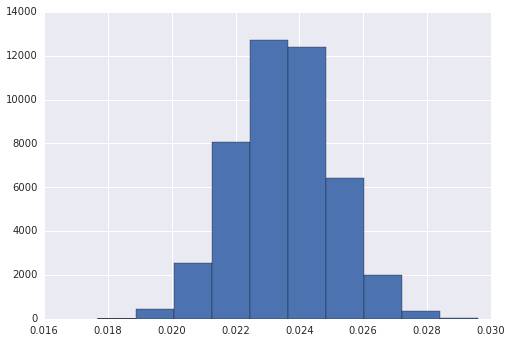

In [544]:
plt.hist(samples[:,0])

In [545]:
np.percentile(samples[:,0], 50)

0.02352211882752445

In [558]:
1./((np.percentile(samples[:,0], 50)-np.percentile(samples[:,0], 16))/np.percentile(samples[:,0], 50))

15.461154227499904

In [559]:
x.shape

(970,)

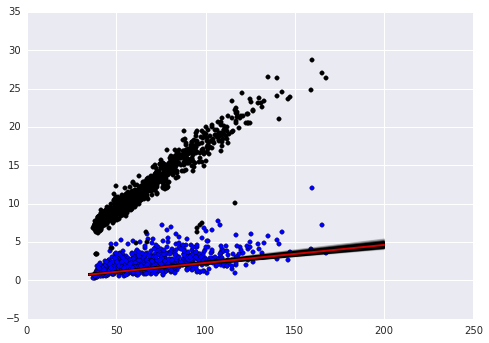

In [552]:
xl = np.array([35, 200])
for m, b in samples[np.random.randint(len(samples), size=500)]:
    plt.plot(xl, m*xl+b, color="k", alpha=0.1)
plt.plot(xl, m_ml*xl+b_ml, color="r", lw=2, alpha=0.8)
#plt.plot(xl, m_ml*xl+b_ml, color="y", lw=2, alpha=0.8)
plt.scatter(x,y)
plt.scatter(x,errlist[(errlist[:,0]!=0)][:,3][filter],c='k')
#pl.errorbar(x, y, yerr=yerr, fmt=".k")

In [566]:
from scipy.stats import chisquare

In [606]:
xhi2,p=chisquare(y,f_exp=m_ml*x+b_ml)

In [608]:
1-p

0.00038735726435057405

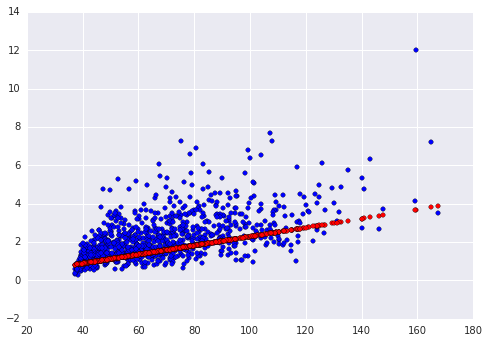

In [572]:
plt.scatter(x,y)
plt.scatter(x,m_ml*x+b_ml,c='r')

In [591]:
observed_values=scipy.array([18,21,16,7,15])
expected_values=scipy.array([22,24,18,8,16])

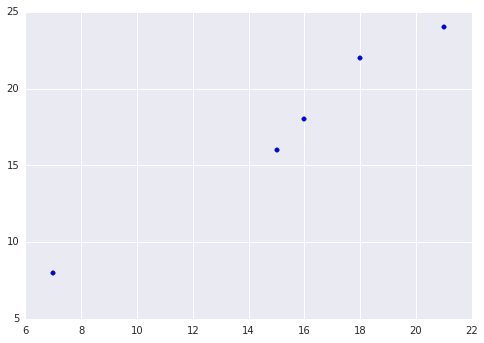

In [592]:
plt.scatter(observed_values,expected_values)

In [593]:
chisquare(observed_values, f_exp=expected_values)

(1.5119949494949494, 0.82451460975493762)

In [611]:
from pymc import discrepancy

In [612]:
discrepancy?

In [683]:
samples[:,1]

array([ 0.06197629,  0.00647111, -0.00281858, ...,  0.00010253,
        0.00010253, -0.00042499])

In [672]:
y_sim=samples[:10000,1]+samples[:10000,0]*x[:,np.newaxis]

In [723]:
y_sim[:,1].shape

(970,)

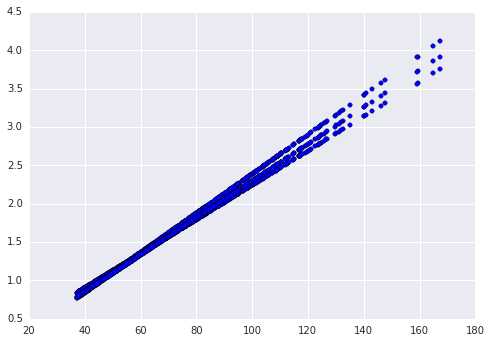

In [743]:
plt.scatter(x,y_sim[:,1])
plt.scatter(x,y_sim[:,46])
plt.scatter(x,y_sim[:,1046])

In [750]:
y_sim[0].shape

(10000,)

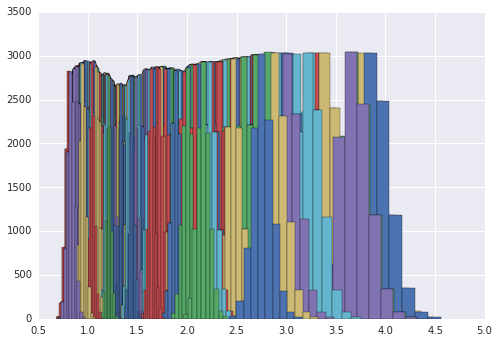

In [759]:
exval=np.zeros(len(x))
for i in range(len(x)):
    a=plt.hist(y_sim[i])
    exval[i]=a[1][np.argmax(a[0])]

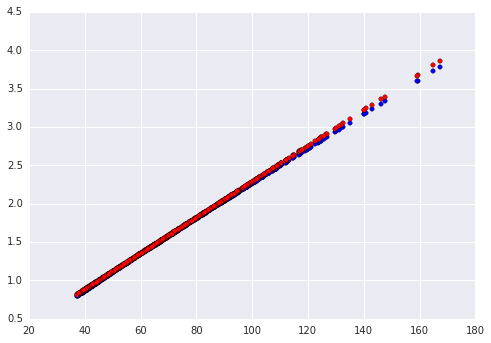

In [762]:
plt.scatter(x,exval)
plt.scatter(x,m_ml*x+b_ml,c='r')

In [758]:
a[1][np.argmax(a[0])]

0.8453260043563634

In [739]:
y_sim[:,1]

array([ 2.12954092,  2.83866704,  2.03188369,  2.45123834,  3.69771867,
        3.2752848 ,  1.83468003,  1.56684972,  2.34664502,  1.51986986,
        1.87029733,  2.43349435,  2.90415769,  2.43436888,  2.62324847,
        1.38003128,  1.38402589,  1.14946141,  0.98646209,  1.43617898,
        1.56916191,  1.55802806,  2.27352342,  1.59936609,  2.22669686,
        1.37429958,  1.3191688 ,  1.64640293,  1.37153023,  1.21107077,
        0.893302  ,  1.85233186,  1.33141409,  2.01776712,  1.23303085,
        1.44183413,  1.32267968,  1.88651347,  1.53639766,  2.13808901,
        1.0070031 ,  1.53587196,  0.89759464,  2.46775271,  1.95603882,
        2.23903992,  1.1712968 ,  1.73660471,  1.58676691,  2.04916815,
        1.60709763,  0.93689241,  2.47574265,  1.64992413,  1.50817224,
        1.75132058,  1.46472237,  1.02257889,  0.93117526,  0.94979991,
        0.88587432,  0.99005931,  1.20772342,  1.19322406,  1.00061183,
        1.83582454,  0.99234677,  1.61538471,  1.69343182,  1.83

In [738]:
for kk in range(1000):
    thetai=samples[kk,0],samples[kk,1]
    print np.exp(lnprob(thetai,x,y_sim[:,kk]))

4.81167886451e-156
7.87309976048e-157
7.0087862515e-151
2.37778565271e-153
4.82096016639e-154
8.33543238232e-154
7.8378813341e-154
3.12398587962e-153
2.39773870372e-156
2.42807218414e-162
2.42807218414e-162
1.06709036424e-162
1.06709036424e-162
1.02979923686e-161
1.02979923686e-161
1.23496150299e-166
1.35514491051e-160
4.20865272363e-160
4.20865272363e-160
2.44259751202e-163
2.03927180987e-162
2.7488465425e-161
9.65400184784e-161
9.65400184784e-161
5.83254676036e-161
6.19020179336e-161
3.08075551478e-161
1.84317382086e-155
1.84317382086e-155
4.95287466589e-165
4.95287466589e-165
6.86141273163e-165
5.50032949303e-166
5.73896953018e-166
1.28799884152e-167
1.28799884152e-167
1.28799884152e-167
9.95144110441e-171
9.95144110441e-171
9.95144110441e-171
9.95144110441e-171
2.47276462873e-166
4.1476137285e-167
6.21946209847e-167
4.1522575537e-169
2.76219411205e-169
4.15231319012e-161
4.39766881106e-159
4.39766881106e-159
4.39766881106e-159
1.49847918745e-156
1.49847918745e-156
1.15744730419e-16

In [713]:
y_exp=y_sim.sum(axis=0)

In [714]:
D=discrepancy(y,y_sim.T,y_exp)

Bayesian p-value: p=1.000


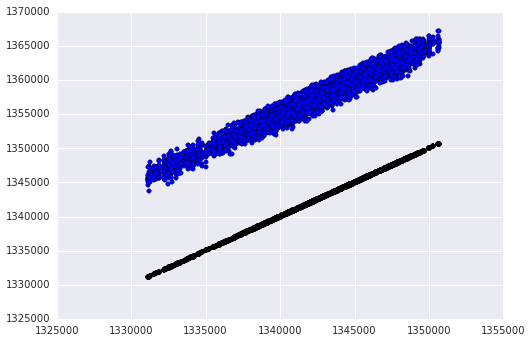

In [715]:
plt.scatter(D[0],D[1])
plt.scatter(D[0],D[0],c='k')

In [658]:
y_sim.shape

(970, 45000)

In [690]:
import pymc as mc
import numpy as np
alpha = 2
beta = 2
n = 13
yes = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,0,0])

p = mc.Beta('p',alpha,beta)
surv = mc.Bernoulli('surv',p=p,observed=True,value=yes)
surv_sim = mc.Bernoulli('surv_sim', p=p, size=n)

mc_est = mc.MCMC({'p':p,'surv':surv,'surv_sim':surv_sim})
mc_est.sample(10000,5000,2)


#here I have issues
D = mc.discrepancy(yes, surv_sim.trace(), mc.bernoulli_expval(p.trace()))

 [-----------------100%-----------------] 10000 of 10000 complete in 0.3 secBayesian p-value: p=0.594


In [694]:
p.trace()

array([ 0.68595081,  0.70447522,  0.70447522, ...,  0.81121508,
        0.81121508,  0.81121508])

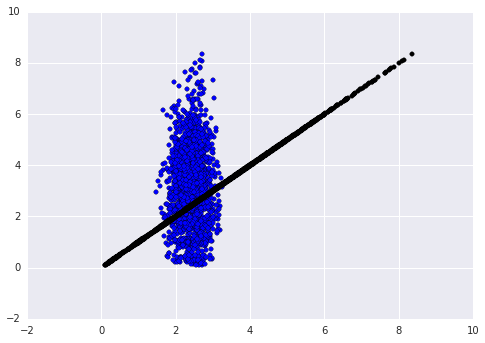

In [688]:
plt.scatter(D[0],D[1])
plt.scatter(D[1],D[1],c='k')

https://hflog.wordpress.com/2014/04/01/how-to-perform-a-chi-squared-goodness-of-fit-test-in-python/

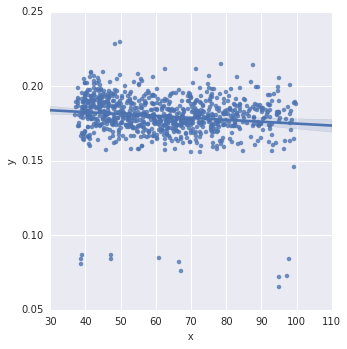

In [393]:
# mean reported error
x=errlist[(errlist[:,0]!=0)][:,0][filter]
y=errlist[(errlist[:,0]!=0)][:,6][filter]
df5=pd.DataFrame({'x' : x, 'y': y})
sns.lmplot(x="x", y="y", data=df5)

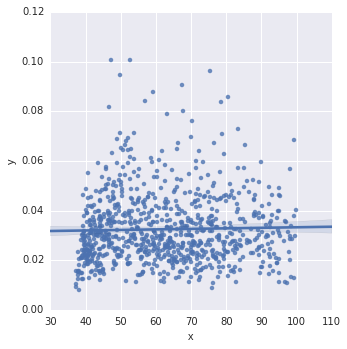

In [395]:
# weighted standard deviation vs unweighted standard deviation for n>4
x=errlist[(errlist[:,0]!=0)][:,0][filter]
y=errlist[(errlist[:,0]!=0)][:,2][filter]/x
df5=pd.DataFrame({'x' : x, 'y': y})
sns.lmplot(x="x", y="y", data=df5)

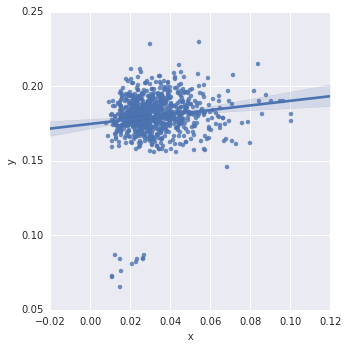

In [405]:
# weighted standard deviation relative error vs mean relative error
# NO CORRELATION
x=errlist[(errlist[:,0]!=0)][:,2][filter]/errlist[(errlist[:,0]!=0)][:,0][filter]
y=errlist[(errlist[:,0]!=0)][:,6][filter]
df5=pd.DataFrame({'x' : x, 'y': y})
sns.lmplot(x="x", y="y", data=df5)
#plt.plot(range(35),range(35))

(0, 20)

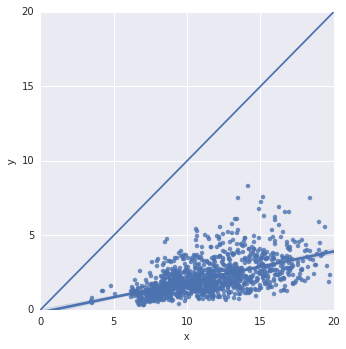

In [368]:
# mean reported error vs weighted standard deviation for n>4
x=errlist[(errlist[:,0]!=0)][:,3][filter]
y=errlist[(errlist[:,0]!=0)][:,2][filter]
df5=pd.DataFrame({'x' : x, 'y': y})
sns.lmplot(x="x", y="y", data=df5)
plt.plot(range(35),range(35))
plt.xlim(0,20)
plt.ylim(0,20)

(0, 20)

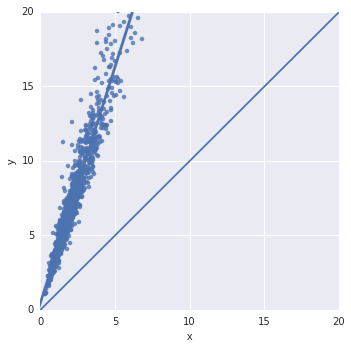

In [370]:
# weighted standard deviation vs unweighted standard deviation for n>4
x=errlist[(errlist[:,0]!=0)][:,2][filter]
y=errlist[(errlist[:,0]!=0)][:,4][filter]
df5=pd.DataFrame({'x' : x, 'y': y})
sns.lmplot(x="x", y="y", data=df5)
plt.plot(range(35),range(35))
plt.xlim(0,20)
plt.ylim(0,20)

In [193]:
listcut[errlist[:,0]!=0]

array(['2MASX J04191179+5552439', '2MASX J04451775+4049326',
       '2MASX J05154347+1921467', ..., 'WEIN 033', 'WEIN 069', 'WEIN 171'], dtype=object)

In [189]:
np.unique(df1.Method[dfilter])

array(['Tully-Fisher'], dtype=object)

In [114]:
listnames=np.unique(df['Galaxy ID'])

In [136]:
errlist.shape

(19965, 4)

In [219]:

dfilter=(df['Galaxy ID']==listcut[np.argmax(errlist[:,2])])
dummy=df[dfilter]
dumerr=disterr[dfilter]
em=len(dumerr)
dumw=dumerr
wave=(dummy['D (Mpc)']*1/dumw**2).sum()/(1/dumw**2).sum()
wstd=np.sqrt((((dummy['D (Mpc)']-wave)**2)*1/dumw**2).sum()/((em-1./em)*(1/dumw**2).sum()))
werr=wstd/c4(em)
print dummy['D (Mpc)'].mean(),wave, em,werr,dumerr.mean()

139.5 104.506007259 4 22.4142542011 29.06144


In [218]:
dummy['D (Mpc)'].std()

42.406760467328006

In [212]:
dumerr

7079    14.01440
7081    33.50548
7082    33.19200
7083    35.53388
dtype: float64

In [213]:
dummy['D (Mpc)']*1/dumerr**2

7079    0.386959
7081    0.140743
7082    0.145229
7083    0.129885
dtype: float64

In [74]:
dummy

,Exclusion Code,D,G,Galaxy ID,m-M,err,D (Mpc),Method,REFCODE,SN ID,redshift (z),Hubble const.,Adopted LMC modulus,Date (Yr. - 1980),Notes
4,NaN,3,2,UGC 12889,34.16,0.40,68.0,Tully-Fisher,2007A&A...465...71T,NaN,NaN,NaN,NaN,27,mean
5,NaN,4,2,UGC 12889,34.66,0.45,85.6,Tully-Fisher,2007A&A...465...71T,NaN,NaN,NaN,NaN,27,K
6,NaN,5,2,UGC 12889,34.68,0.47,86.1,Tully-Fisher,2007A&A...465...71T,NaN,NaN,NaN,NaN,27,H
7,NaN,6,2,UGC 12889,34.70,0.46,86.9,Tully-Fisher,2007A&A...465...71T,NaN,NaN,NaN,NaN,27,J


In [53]:
listerr
for i in listcut:
    if(len(df['Galaxy ID'][df['Galaxy ID']==i])>4):
        

(19965,)

In [9]:
listrs=np.unique(df['Galaxy ID'][np.isnan(df['redshift (z)'])])

In [17]:
list1=[]
for k in range(len(listrs)):
    if(len(df[df['Galaxy ID']==listrs[k]])>4):
        list1.append(listrs[k])

In [19]:
len(list1)

6957